# Homework 5

## Linear Regression Error

Consider a noisy target $y = {\mathbf{w}^{*}}^\intercal \mathbf{x} + \epsilon$, where $x \in \mathbb{R}^d$ (with the added coordinate $x_0 = 1$), $y \in \mathbf{R}$, $\mathbf{w}^{∗}$ is an unknown vector, and $\epsilon$ is a noise term with zero mean and $\sigma^2$ variance. Assume $\epsilon$ is independent of $x$
and of all other $\epsilon$'s. If linear regression is carried out using a training data set
$\mathcal{D} = \{(\mathbf{x}_1 ,y_1),\ldots,(\mathbf{x}_N ,y_N )\}$, and outputs the
parameter vector $\mathbf{w}_\mathrm{lin}$, it can be shown that the expected in-sample error $E_\mathrm{in}$
with respect to $\mathcal{D}$ is given by:
$$\mathbb{E}_\mathcal{D} [ E_\mathrm{in} (\mathbf{w}_\mathrm{lin})]
= \sigma^2 \left( 1 - \frac{d+1}{N} \right)$$

###  1.
For $\sigma = 0.1$ and $d = 8$, which among the following choices is the smallest
number of examples $N$ that will result in an expected $E_\mathrm{in}$ greater than $0.008$?

In [1]:
sigma = 0.1
d = 8
for n in [10, 25, 100, 500, 1000]
    println(sigma^2 * (1 - (d+1)/n))
end

0.001
0.006400000000000001
0.009100000000000002
0.009820000000000002
0.009910000000000002


## Nonlinear Transforms
In linear classification, consider the feature transform $\Phi: \mathbb{R}^2 \to \mathbb{R}^2$
(plus the added zeroth coordinate) given by:
$$\Phi(1, x_1, x_2) = (1, x_1^2, x_2^2)$$

### 2.
Which of the following sets of constraints on the weights in the $\mathcal{Z}$ space could
correspond to the hyperbolic decision boundary in $\mathcal{X}$ depicted in the figure?

You may assume that $\tilde{w}_0$ can be selected to achieve the desired boundary.

The general form of hyperbola in $(x,y)$-place is
$$\frac{x^2}{a^2} - \frac{y^2}{b^2} = 1$$
Only **d** is consistent with this.

Now, consider the 4th order polynomial transform from the input space $\mathbb{R}^2$:
$$\Phi_4: \mathbf{x} \to (1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, x_1^2 x_2, x_1 x_2^2, x_2^3, x_1^4, x_1^3 x_2, x_1^2 x_2^2, x_1 x_2^3, x_2^4)$$

### 3.
What is the smallest value among the following choices that is not smaller than
the VC dimension of a linear model in this transformed space?

The VC dimension of the transformed space is smaller 15. So, **c** is the answer.

## Gradient Descent
Consider the nonlinear error surface $E(u,v) = (ue^v − 2ve^{−u})^2$. We start at the point
$(u,v) = (1,1)$ and minimize this error using gradient descent in the $uv$ space. Use
$\eta = 0.1$ (learning rate, not step size).

### 4.
What is the partial derivative of $E(u,v)$ with respect to $u$, i.e., $\frac{\partial E}{\partial u}$?

$\frac{\partial E}{\partial u} = 2(e^{v} + 2ve^{-u})(ue^v - 2ve^{-u})$

### 5.
How many iterations (among the given choices) does it take for the error $E(u,v)$
to fall below $10^{−14}$ for the first time? In your programs, make sure to use double
precision to get the needed accuracy.

### 6.
After running enough iterations such that the error has just dropped below
$10^{−14}$, what are the closest values (in Euclidean distance) among the following
choices to the final $(u,v)$ you got in Problem 5?

In [2]:
function err(u, v)
    return (u*e^v - 2*v*e^(-u))^2
end

function dE_du(u, v)
    return 2*(e^(v) + 2*v*e^(-u))*(u*e^(v) - 2*v*e^(-u))
end

function dE_dv(u, v)
    return 2*(u*e^(v) - 2*v*e^(-u))*(u*e^(v) - 2*e^(-u))
end

function update_weights(weights, eta)
    u, v = weights
    weights -= eta * [dE_du(u, v), dE_dv(u, v)]
    return weights
end

function update_a_weight(weights, idx, eta)
    u, v = weights
    if idx == 1
        weights[1] -= eta * dE_du(u, v)
    elseif idx == 2
        weights[2] -= eta * dE_dv(u, v)
    end
    return weights
end

update_a_weight (generic function with 1 method)

In [3]:
function question5and6()
    eta = 0.1
    threshold = 1e-14
    weights = [1.0, 1.0]
    
    for idx in 1:1000
        new_err = err(weights[1], weights[2])
        if new_err < threshold
            println(idx-1)
            return weights
        else
            weights = update_weights(weights, eta)
        end
    end
end

question5and6 (generic function with 1 method)

In [4]:
question5and6()

10


2-element Array{Float64,1}:
 0.0447363
 0.0239587

### 7.
Now, we will compare the performance of "coordinate descent." In each iteration,
we have two steps along the 2 coordinates. Step 1 is to move only along
the $u$ coordinate to reduce the error (assume first-order approximation holds
like in gradient descent), and step 2 is to reevaluate and move only along the $v$
coordinate to reduce the error (again, assume first-order approximation holds).
Use the same learning rate of $\eta = 0.1$ as we did in gradient descent. What will
the error $E(u,v)$ be closest to after 15 full iterations (30 steps)?

In [5]:
function question7()
    eta = 0.1
    threshold = 1e-14
    weights = [1.0, 1.0]
    
    for idx in 1:15
        weights = update_a_weight(weights, 1, eta)
        weights = update_a_weight(weights, 2, eta)
    end
    return err(weights[1], weights[2])
end

question7 (generic function with 1 method)

In [6]:
question7()

0.13981379199615315

## Logistic Regression
In this problem you will create your own target function $f$ (probability in this case)
and data set $\mathcal{D}$ to see how Logistic Regression works. For simplicity, we will take $f$
to be a $0/1$ probability so $y$ is a deterministic function of $\mathbf{x}$.

Take $d = 2$ so you can visualize the problem, and let $X = [−1,1]\times[−1,1]$ with uniform
probability of picking each $x \in \mathcal{X}$. Choose a line in the plane as the boundary between
$f(x) = 1$ (where $y$ has to be $+1$) and $f(x) = 0$ (where $y$ has to be $−1$) by taking two
random, uniformly distributed points from $\mathcal{X}$ and taking the line passing through
them as the boundary between $y = \pm 1$. Pick $N = 100$ training points at random
from $\mathcal{X}$, and evaluate the outputs $y_n$ for each of these points $\mathbf{x}_n$.

Run Logistic Regression with Stochastic Gradient Descent to find $g$, and estimate $E_\mathrm{out}$
(the **cross entropy** error) by generating a sufficiently large, separate set of points to
evaluate the error. Repeat the experiment for $100$ runs with different targets and take
the average. Initialize the weight vector of Logistic Regression to all zeros in each
run. Stop the algorithm when $\|w^{(t−1)} − w^{(t)} \| < 0.01$, where $w^{(t)}$ denotes the weight
vector at the end of epoch $t$. An epoch is a full pass through the $N$ data points (use a
random permutation of $1,2,\cdots,N$ to present the data points to the algorithm within
each epoch, and use different permutations for different epochs). Use a learning rate
of $0.01$.

### 8.
Which of the following is closest to $E_{out}$ for $N = 100$?

### 9.
How many epochs does it take on average for Logistic Regression to converge for
$N = 100$ using the above initialization and termination rules and the specified
learning rate? Pick the value that is closest to your results.

In [1]:
function gen_target()
    linpts = 2.0*rand((2,2)) - 1.0
    targ_weights = [1.0; linpts \ [-1, -1]] # a bit slow
    return targ_weights
end

gen_target (generic function with 1 method)

In [2]:
function gen_dataset(num_points, targ_weights)
    points = [ones(num_points) (2.0*rand((num_points,2)) - 1.0)]
    labels = sign(points*targ_weights)
    return points, labels
end

gen_dataset (generic function with 1 method)

In [3]:
function cross_entropy_error(points, weights, labels)
    err = 0.0
    for idx in 1:length(labels)
        err += log(1.0 + exp(-labels[idx] * dot(weights, points[idx,:][:])))
    end
    return err / length(labels)
end

cross_entropy_error (generic function with 1 method)

In [4]:
# the size of mini batch is 1
function logistic_regression_sgd(points, labels, weights, threshold=0.01, eta=0.01)
    batch_order = collect(1:length(points[:,1]))
    weights_diff_norm = Inf
    num_epochs = 0
    while weights_diff_norm > threshold
        prev_weights = weights[:]
        shuffle!(batch_order)
        for idx in batch_order
            gradient = -(labels[idx] * points[idx,:][:]) / (1 + exp(labels[idx] * dot(weights, points[idx,:][:])))
            weights -= eta * gradient
        end
        weights_diff_norm = norm(weights - prev_weights)
        num_epochs += 1
    end
    return weights, num_epochs
end

logistic_regression_sgd (generic function with 3 methods)

In [8]:
using PyCall,PyPlot
@pyimport seaborn as sns

function plot_regression(points, labels, targ_weights, hypo_weights)

    x11,x12,x21,x22=[], [], [], []
    for idx in 1:size(points)[1]
        if labels[idx] == 1
            push!(x11, points[idx,2])
            push!(x12, points[idx,3])
        else
            push!(x21, points[idx,2])
            push!(x22, points[idx,3])
        end
    end

    fig = figure("regression",figsize=(5,5))
    xlim(-1, 1)
    ylim(-1, 1)
    scatter(x11, x12, color="red")
    scatter(x21, x22, color="blue")
    s = linspace(-1,1)
    targ_func(x) = -targ_weights[2]/targ_weights[3]*x - targ_weights[1]/targ_weights[3]
    hypo_func(x) = -hypo_weights[2]/hypo_weights[3]*x - hypo_weights[1]/hypo_weights[3]
    plot(s, targ_func(s), "g-")
    plot(s, hypo_func(s), "y-")
    title("Regression")
    xlabel(L"$x_1$")
    ylabel(L"$x_2$")
    grid("on")
end

plot_regression (generic function with 1 method)

In [9]:
function question8and9(num_iterations=100, num_out_sample=1000)
    cnt = 0
    cee_sum = 0.0
    for idx in 1:num_iterations
        targ_weights = gen_target()
        weights = zeros(3)
        # in sample
        points, labels = gen_dataset(100, targ_weights)
        weights, num_epochs = logistic_regression_sgd(points, labels, weights)
        cnt += num_epochs
        # out sample
        points, labels = gen_dataset(num_out_sample, targ_weights)
        cee_sum += cross_entropy_error(points, weights, labels)
        # plot
        if idx == num_iterations
            plot_regression(points, labels, targ_weights, weights)
        end
    end

    return cee_sum/num_iterations, cnt/num_iterations
end

question8and9 (generic function with 3 methods)

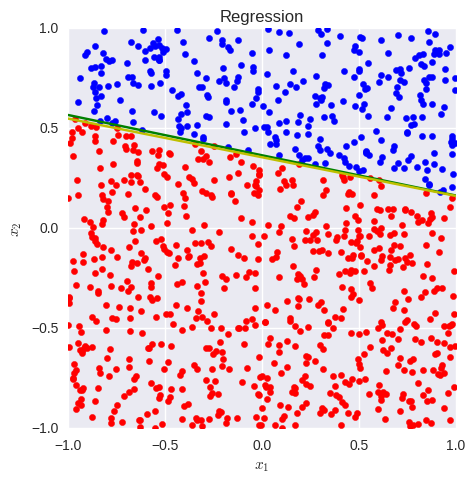

  4.415685 seconds (41.57 M allocations: 3.047 GB, 12.02% gc time)


(0.10334707079549124,341.91)

In [10]:
@time question8and9()

## PLA as SGD

## 10.
The Perceptron Learning Algorithm can be implemented as SGD using which
of the following error functions $\mathrm{e}_n(\mathbf{w})$? Ignore the points $\mathbf{w}$ at which
$\mathrm{e}_n(\mathbf{w})$ is not twice differentiable.

In PLA, we update the weights with the rule
$$
\mathbf{w}(t+1) = \mathbf{w}(t) + y_n \mathbf{x}_n \mbox{ if } \mathbf{x} \mbox{ is misclassified.} \\
\mathbf{w}(t+1) = \mathbf{w}(t) \mbox{ if } \mathbf{x} \mbox{ is well classified.} \\
$$

We can get the gradient of $\mathrm{e}_n(\mathbf{w}) = - \min(0, y_n \mathbf{w}^\intercal \mathbf{x}_n)$ as 
$$\nabla \mathrm{e}_n(\mathbf{w}) = 
\begin{cases}
-y_n x_n & y_n \mathbf{w}^\intercal x_n < 0 \\
0 & y_n \mathbf{w}^\intercal x_n \geq 0
\end{cases}$$

So, we can implement PLA as SGD using an error function of **e**.